## Calculate PSNR

In [2]:
import cv2
import math
import matplotlib.pyplot as plt

In [3]:
# Load Images

src_img_base_name = "butterfly"

# hr_img = cv2.imread(src_img_base_name + "_gray_512.jpg", 0)
# sr_img = cv2.imread(src_img_base_name + "_sr_bic.jpg", 0)
# bi_img = cv2.imread(src_img_base_name + "_bic.jpg", 0)
# srcnn = cv2.imread(src_img_base_name + "_gray_srcnn_x2_1000.jpg", 0)
# subpixel = cv2.imread(src_img_base_name + "_gray_subpixel_x2_1000.jpg", 0)
# print(hr_img.shape, sr_img.shape, bi_img.shape, srcnn.shape, subpixel.shape)

hr_img = cv2.imread(src_img_base_name + "_gray_512.jpg", 0)
bi_img = cv2.imread(src_img_base_name + "_bic.jpg", 0)
ehsr_1 = cv2.imread(src_img_base_name + "_sr_bic.jpg", 0)
# ehsr_2 = cv2.imread(src_img_base_name + "_EHSRx2_ver2.jpg", 0)
ehsr_2 = cv2.imread(src_img_base_name + "_gray_subpixel_x2_2more_conv2_100.jpg", 0)
ehsr_3 = cv2.imread(src_img_base_name + "_gray_subpixel_x2_100.jpg", 0)

In [4]:
start_point = 10
delta = 10
sr_img = ehsr_1

# Crop to get the same shape
hr_img_cropped = hr_img[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]

bi_img_cropped = bi_img[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]

ehsr_1_cropped = ehsr_1[start_point-2:start_point-2+sr_img.shape[0]-delta, start_point-2:start_point-2+sr_img.shape[0]-delta]

ehsr_2_cropped = ehsr_2[start_point-4:start_point-4+sr_img.shape[0]-delta, start_point-4:start_point-4+sr_img.shape[0]-delta]

ehsr_3_cropped = ehsr_3[start_point-4:start_point-4+sr_img.shape[0]-delta, start_point-4:start_point-4+sr_img.shape[0]-delta]

# srcnn_cropped = srcnn[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]
# subpixel_cropped = subpixel[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]

print(hr_img_cropped.shape, bi_img_cropped.shape, ehsr_1_cropped.shape, ehsr_2_cropped.shape, ehsr_3_cropped.shape)
print("\n HR Image = ")
print(hr_img_cropped)
print("\n Bic Image = ")
print(bi_img_cropped)
print("\n EHSR 1 Image = ")
print(ehsr_1_cropped)
print("\n EHSR 2 Image = ")
print(ehsr_2_cropped)
print("\n EHSR 3 Image = ")
print(ehsr_3_cropped)
# print("\n SubPixel Image = ")
# print(srcnn_cropped)

(236, 236) (236, 236) (236, 236) (236, 236) (236, 236)

 HR Image = 
[[ 29  32  48 ...  72  66  67]
 [ 31  36  50 ...  69  66  59]
 [ 31  38  45 ...  60  61  60]
 ...
 [112 119 118 ...  99  99  98]
 [ 88 111 120 ...  99  99  99]
 [ 67  86 104 ...  98  97  98]]

 Bic Image = 
[[ 24  38  55 ...  68  70  69]
 [ 24  40  55 ...  63  62  63]
 [ 26  40  48 ...  62  61  62]
 ...
 [106 117 117 ...  97  97  97]
 [ 88 105 113 ...  98  98  98]
 [ 71  87 101 ...  99  99  99]]

 EHSR 1 Image = 
[[ 28  32  56 ...  69  68  67]
 [ 27  39  60 ...  66  63  62]
 [ 27  36  49 ...  58  57  57]
 ...
 [109 120 119 ...  97  97  97]
 [ 90 108 118 ...  98  99  99]
 [ 69  87 104 ... 100 100 100]]

 EHSR 2 Image = 
[[ 53  98 106 ...  21  18  19]
 [ 37  58  65 ...  35  28  30]
 [ 10  13  35 ...  53  52  44]
 ...
 [ 94 108  99 ...  89  83  83]
 [ 73  96 112 ...  84  84  85]
 [ 66  81 114 ...  86  85  86]]

 EHSR 3 Image = 
[[ 43  75 104 ...  15  14  12]
 [ 42  65  83 ...  36  29  27]
 [  6  19  52 ...  55  56  51]
 

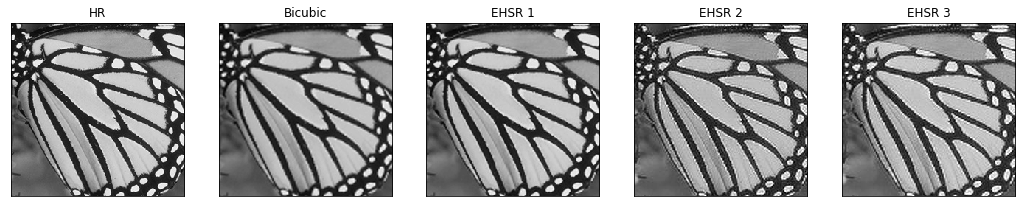

In [5]:
plt.figure(figsize = (18, 10))

plt.subplot(151), plt.imshow(hr_img_cropped, cmap = 'gray')
plt.title("HR"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(bi_img_cropped, cmap = 'gray')
plt.title("Bicubic"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(ehsr_1_cropped, cmap = 'gray')
plt.title("EHSR 1"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(ehsr_2_cropped, cmap = 'gray')
plt.title("EHSR 2"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(ehsr_3_cropped, cmap = 'gray')
plt.title("EHSR 3"), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
bi_MSE = np.square(np.subtract(bi_img_cropped, hr_img_cropped)).mean()
ehsr1_MSE = np.square(np.subtract(ehsr_1_cropped, hr_img_cropped)).mean()
ehsr2_MSE = np.square(np.subtract(ehsr_2_cropped, hr_img_cropped)).mean()
ehsr3_MSE = np.square(np.subtract(ehsr_3_cropped, hr_img_cropped)).mean()
# subpixel_MSE = np.square(np.subtract(subpixel_cropped, hr_img_cropped)).mean()
print(bi_MSE, ehsr1_MSE, ehsr2_MSE, ehsr3_MSE)

41.213426457914395 34.35295173800632 92.20827348463085 79.39349324906637


In [7]:
bi_PSNR = 20 * math.log10(255.0 / math.sqrt(bi_MSE))
ehsr1_PSNR = 20 * math.log10(255.0 / math.sqrt(ehsr1_MSE))
ehsr2_PSNR = 20 * math.log10(255.0 / math.sqrt(ehsr2_MSE))
ehsr3_PSNR = 20 * math.log10(255.0 / math.sqrt(ehsr3_MSE))
# subpixel_PSNR = 20 * math.log10(255.0 / math.sqrt(subpixel_MSE))
print(bi_PSNR, ehsr1_PSNR, ehsr2_PSNR, ehsr3_PSNR)

31.98041637876846 32.771163016134565 28.483104705353455 29.132954498994987


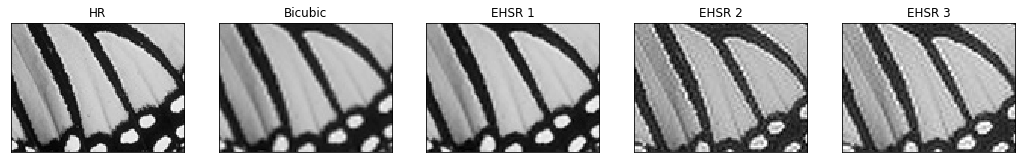

In [8]:
plt.figure(figsize = (18, 10))

y_crop_fr = 150
y_crop_to = 240
x_crop_fr = 90
x_crop_to = 205

plt.subplot(151), plt.imshow(hr_img_cropped[y_crop_fr:y_crop_to, x_crop_fr:x_crop_to], cmap = 'gray')
plt.title("HR"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(bi_img_cropped[y_crop_fr:y_crop_to, x_crop_fr:x_crop_to], cmap = 'gray')
plt.title("Bicubic"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(ehsr_1_cropped[y_crop_fr:y_crop_to, x_crop_fr:x_crop_to], cmap = 'gray')
plt.title("EHSR 1"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(ehsr_2_cropped[y_crop_fr:y_crop_to, x_crop_fr:x_crop_to], cmap = 'gray')
plt.title("EHSR 2"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(ehsr_3_cropped[y_crop_fr:y_crop_to, x_crop_fr:x_crop_to], cmap = 'gray')
plt.title("EHSR 3"), plt.xticks([]), plt.yticks([])
plt.show()